# Decision Tree

### 🧐 Why are Decision Trees used?
- **Simplicity & Clarity**: They are visual and easy to understand, even for non-technical audiences.
- **Versatility**: Work well for both **classification** and **regression** problems.
- **Interpretability**: The structure is transparent, allowing easy reasoning behind predictions.

---

### ⚙️ How are Decision Trees used?
- **Data Splitting**: Break data into smaller subsets using features and conditions.
- **Decision Paths**: Follow branches from root to leaf to arrive at an outcome.
- **Handling Data**: Can deal with missing values, non-linear relationships, and categorical/numerical data without much preprocessing.

---

### 🌍 Where are Decision Trees used?
- **🏦 Loan Approval (Banking)**: Assess applications based on credit score, income, and history.
- **🩺 Medical Diagnosis**: Predict diseases like diabetes from clinical data (glucose, BMI, blood pressure).
- **🎓 Education**: Predict pass/fail outcomes from attendance, study hours, and grades.
- **🛒 Customer Churn**: Identify customers likely to leave based on purchase history and interactions.
- **💳 Fraud Detection**: Spot unusual financial transactions for further investigation.
- **🤖 Machine Learning & Data Mining**: Build predictive models for various industries.


 Model Accuracy: 100.00%


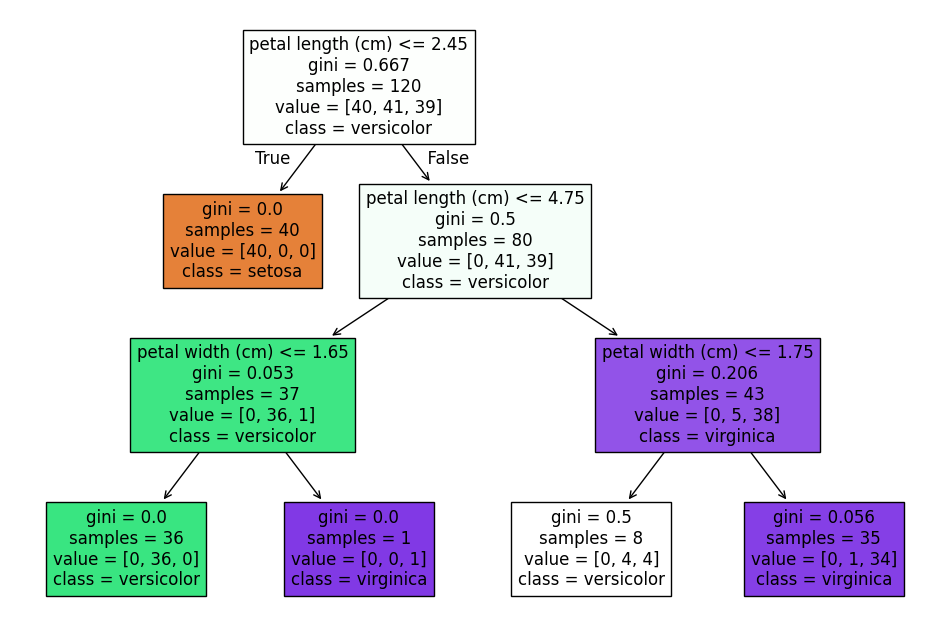

In [4]:
#  Importing  libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Loading dataset (Iris dataset - flower classification)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

#  Spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Creating and train the Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluating the model
accuracy = clf.score(X_test, y_test)
print(f" Model Accuracy: {accuracy*100:.2f}%")

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)
plt.show()

# Splitting Criteria in Decision Trees

### 🧐 Why is Splitting Criteria Important?
- **Purpose**: In a Decision Tree, each split (node) divides the data into subsets to make them more "pure" (homogeneous).
- **Goal**: The chosen criteria decides which feature and threshold give the best split, leading to the most accurate predictions.
- **Impact**: The quality of splits directly affects the accuracy, depth, and generalization of the model.

---

### ⚙️ How Does Splitting Work?
1. **Evaluate each possible split** for every feature.
2. **Measure the quality** of the split using a mathematical criterion.
3. **Choose the best split** that maximizes class separation or prediction accuracy.


### 🌍 Where are Splitting Criteria Used?
- **Classification Problems**:  
  - Choosing the best feature to classify categories like spam/not spam, disease/no disease, etc.
  - Example: Using Gini Impurity or Entropy to decide splits.

- **Regression Problems**:  
  - Choosing splits that minimize prediction error for continuous outputs.
  - Example: Predicting house prices using MSE.

- **Feature Importance Calculation**:  
  - Splitting criteria help rank features based on how often and how effectively they are used for splitting.

---

### 📝 Key Notes
- **Default in scikit-learn**:
  - `criterion="gini"` for classification.
  - `criterion="mse"` (now `squared_error`) for regression.
- The choice between Gini and Entropy usually doesn’t make a huge difference in performance, but **Gini is slightly faster**.


## Gini Impurity

### 🧐 Why use Gini Impurity?
- **Purpose**: Gini Impurity measures how often a randomly chosen sample would be misclassified if it were randomly labeled according to the distribution of labels in the subset.
- **Goal**: Lower Gini Impurity means a purer (more homogeneous) node.
- **Why preferred**: Often the default in Decision Trees because it’s faster to compute than Entropy and works well in most cases.

---

#### Steps:
1. Calculate the proportion of each class in the node.
2. Square each proportion.
3. Sum the squared proportions.
4. Subtract from 1 → lower value means higher purity.

---

### 🌍 Where is Gini Impurity Used?
- **Classification Trees**: Default split criterion in `DecisionTreeClassifier` in scikit-learn:
```python
DecisionTreeClassifier(criterion="gini")

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

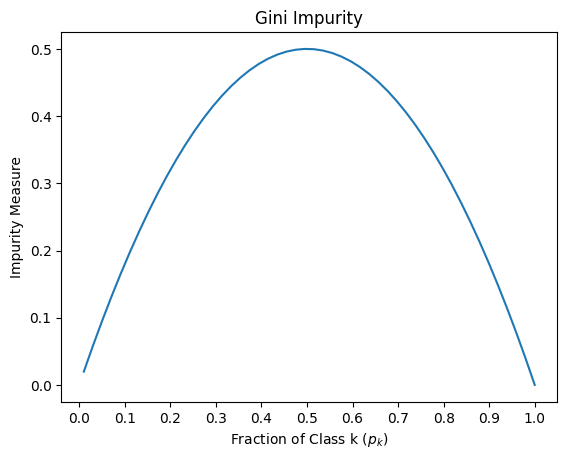

In [8]:
# Visualizing Gini Impurity range
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x) 
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [10]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

# STEP 2: 
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

# STEP 3: 
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no
Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Gini Impurity of the class is 0.459
Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429
The min

## Entropy

### 🧐 Why use Entropy?
- **Purpose**: Entropy measures the amount of uncertainty or disorder in a dataset.
- **Goal**: A split should reduce entropy as much as possible, making the resulting subsets purer.
- **Why preferred**: Based on Information Theory, entropy ensures splits give the maximum information gain.

---

### 🌍 Where is Entropy Used?
- **Classification Trees**:  
  - Used as the split criterion:  
    ```python
    DecisionTreeClassifier(criterion="entropy")
    ```
- **Feature Selection**:  
  - Finds features that give the highest information gain.
- **Data Mining & Information Retrieval**:  
  - Measures uncertainty and improves decision-making processes.

---

### 📝 Key Notes:
- Range: 0 (pure) to log₂(n_classes) (maximum disorder).
- **Entropy vs Gini**: Entropy uses logarithms → slightly slower but can be more theoretically aligned with information theory.


 Model Accuracy (Entropy): 100.00%


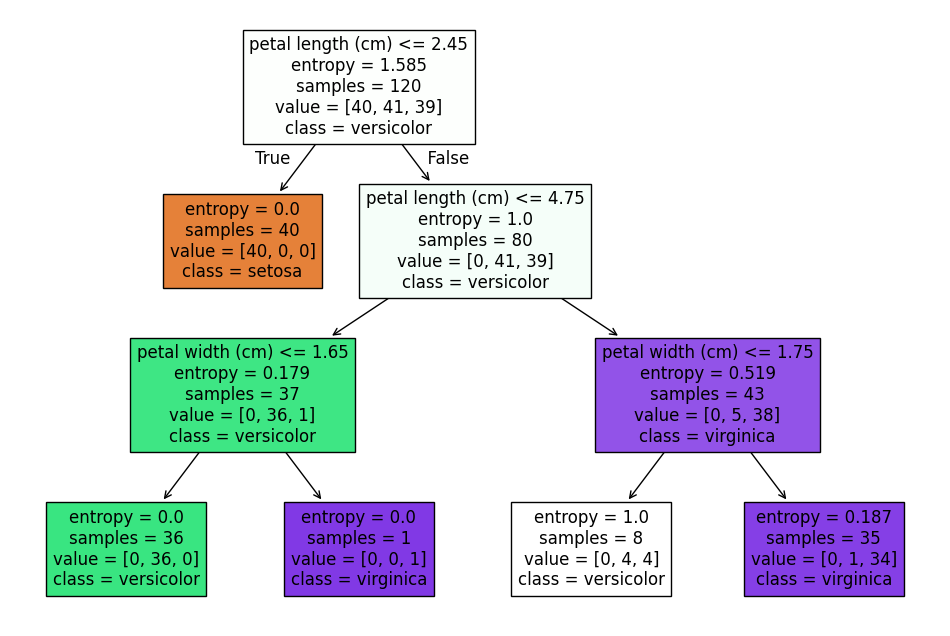

In [11]:
# 🌳 Decision Tree with Entropy Criterion

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#  Loading dataset
iris = load_iris()
X = iris.data
y = iris.target

# Spliting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Creating Decision Tree with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

# Training the model
clf_entropy.fit(X_train, y_train)

# Checking accuracy
accuracy = clf_entropy.score(X_test, y_test)
print(f" Model Accuracy (Entropy): {accuracy*100:.2f}%")

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf_entropy,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)
plt.show()

## Information Gain

### 🧐 Why use Information Gain?
- **Purpose**: Measures how much "information" a feature gives us about the target variable.
- **Goal**: Choose the feature and split that maximally reduces uncertainty in the data.
- **Why important**: Without it, a tree wouldn’t know which feature to split on first.

---

### 🌍 Where is Information Gain Used?
- **Decision Tree Classification**:
  - To choose the best feature at each split:
    ```python
    DecisionTreeClassifier(criterion="entropy")  # uses Information Gain
    ```
- **Feature Selection**:
  - Ranking features based on their contribution to reducing uncertainty.
- **Text Classification & NLP**:
  - Selecting the most informative words for spam detection, sentiment analysis, etc.

---

### 📝 Key Notes:
- Higher Information Gain = better split.
- **Entropy** is the base measure for Information Gain.
- **Bias note**: Information Gain may prefer features with many distinct values — use Gain Ratio to fix this.


## Information gain using mutual_info_classif

In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, y)
print("Information Gain for each feature:", info_gain)

Information Gain for each feature: [0.48460594 0.26337889 0.99279531 0.97637069]


# Information gain using mutual_info_regression

In [14]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1])

# Calculate Mutual Information using mutual_info_regression
mutual_info = mutual_info_regression(X, y)
print("Mutual Information for each feature:", mutual_info)

Mutual Information for each feature: [0.42283584 0.54090791]


# k-Nearest Neighbors (kNN)

### 🤖 What is KNN?
KNN is a supervised, non-parametric, and instance-based learning algorithm. It makes predictions by looking at the 'k' closest training points and using their labels:
- **Classification**: assigns the most common class among neighbors
- **Regression**: uses the average value of neighboring points  

---

### 💡 Why Use KNN?
- **Simple and intuitive**: easy to understand and implement
- **Versatile**: works for both classification and regression tasks  
- **No distribution assumptions**: it's non-parametric, meaning it doesn't assume anything about data shape  

---

### ⚙️ How Does KNN Work?
1. **Choose K** (number of neighbors) — a small odd number is common to avoid ties. K ≈ √n is a common rule of thumb.  
2. **Compute distance** to all training points using metrics like *Euclidean*, *Manhattan*, or *Cosine*.  
3. **Select K nearest neighbors** and:
   - For classification, predict based on the majority vote.
   - For regression, compute the average value.  


In [17]:
# Importing necessary modules
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Loading and shuffling dataset (Iris)
iris = datasets.load_iris()
features, labels = iris.data, iris.target

# 2. Randomizing the split for better generalization
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, shuffle=True, random_state=123
)

# 3. Instantiate KNN classifier (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

# 4. Fit model
knn.fit(X_train, y_train)

# 5. Making predictions
predictions = knn.predict(X_test)

# 6. Evaluating performance
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=iris.target_names))

Confusion Matrix:
 [[18  0  0]
 [ 0  9  1]
 [ 0  0 17]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.90      0.95        10
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## 📏 Euclidean Distance  

### What:  
- The straight-line distance between two points in Euclidean space.  

### Why:  
- Best for continuous numerical features.  
- Captures the true geometric distance.

### Where:  
- Used in KNN, clustering (K-Means), image recognition, and spatial data analysis.

Euclidean Distance: 5.0


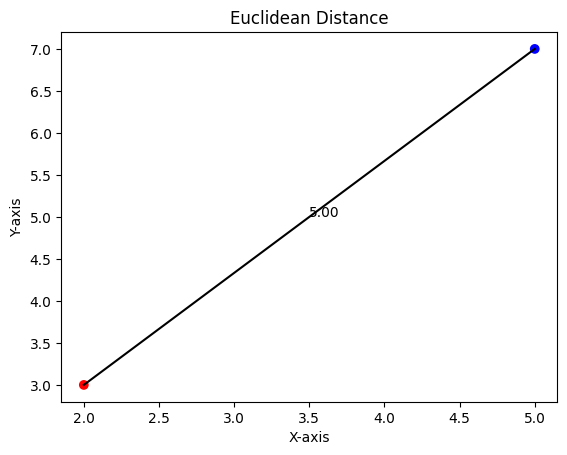

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

point1 = [2, 3]
point2 = [5, 7]
distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {distance}")

# Plotting the points and the Euclidean distance
plt.figure()
plt.scatter(*zip(*[point1, point2]), color=['red', 'blue'])
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black')
plt.text((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2, f'{distance:.2f}', color='black')
plt.title('Euclidean Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## 🛣️ Manhattan Distance 

 ### What:  
- The sum of absolute differences between points (also called L1 norm or taxicab distance).  

### Why:  
- Works well with high-dimensional or sparse data.  
- Less sensitive to outliers than Euclidean distance.

### Where:  
- Used in KNN for grid-like path problems, NLP with sparse vectors, and feature spaces where movements are axis-aligned.

Manhattan Distance: 7


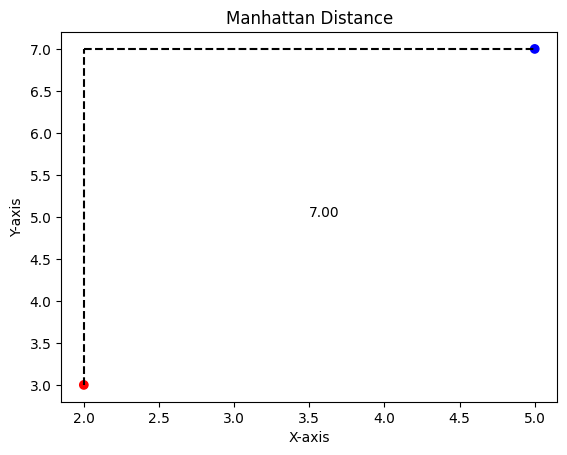

In [23]:
# Calculate Manhattan distance
def manhattan_distance(point1, point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

distance = manhattan_distance(point1, point2)
print(f"Manhattan Distance: {distance}")

# Plotting the points and the Manhattan distance
plt.figure()
plt.scatter(*zip(*[point1, point2]), color=['red', 'blue'])
plt.plot([point1[0], point1[0]], [point1[1], point2[1]], color='black', linestyle='--')
plt.plot([point1[0], point2[0]], [point2[1], point2[1]], color='black', linestyle='--')
plt.text((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2, f'{distance:.2f}', color='black')
plt.title('Manhattan Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## Custom KNN Classifier (Manhattan Distance)

### Steps:
1. **Created a KNN class** with functions to store training data, calculate Manhattan distance, and predict labels.
2. **Generated synthetic data** using make_classification.
3. **Split data** into training and testing sets using train_test_split.
4. **Trained the model** with chosen k neighbors.
5. **Predicted labels** for the test data and compared with actual labels.

In [29]:
## KNN Implementation using Manhattan Distance
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, features, labels):
        self.train_features = features
        self.train_labels = labels

    def manhattan_distance(self, point1, point2):
        return np.sum(np.abs(point1 - point2))

    def predict(self, test_features):
        predictions = []
        for point in test_features:
            predictions.append(self._predict_point(point))
        return np.array(predictions)

    def _predict_point(self, point):
        # Calculate Manhattan distances to all training points
        distances = [self.manhattan_distance(point, train_point)
                     for train_point in self.train_features]
        
        # Get indexes of k nearest points
        nearest_indexes = np.argsort(distances)[:self.k]
        
        # Get the labels of these nearest points
        nearest_labels = [self.train_labels[i] for i in nearest_indexes]
        
        # Return the most common label
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]
        return most_common_label

# Create synthetic dataset
X, y = make_classification(
    n_samples=50,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    weights=[0.5, 0.5],
    random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42
)

# Create classifier with k=3
classifier = MyKNN(k=3)
classifier.fit(X_train, y_train)

# Predict for test set
predictions = classifier.predict(X_test)

print("Predicted labels:", predictions)
print("Actual labels:   ", y_test)


Predicted labels: [1 0 1 1 1 1 1 1 1 0 0 0 0]
Actual labels:    [1 0 1 1 1 1 1 1 1 0 0 0 0]


# Visualize decision boundaries

### What this code does:
1. **Create a 2D dataset** with two classes using make_classification.
2. **Split the dataset** into training and testing sets.
3. **Train a classifier** (Random Forest) on the training data.
4. **Create a mesh grid** covering the feature space.
5. **Predict class labels** for every point on the grid.
6. **Plot decision boundaries** using contourf and overlay the actual data points.

### Key Point:
- The colored regions represent the areas where the classifier predicts each class, helping to visualize how it separates the classes in the feature space.


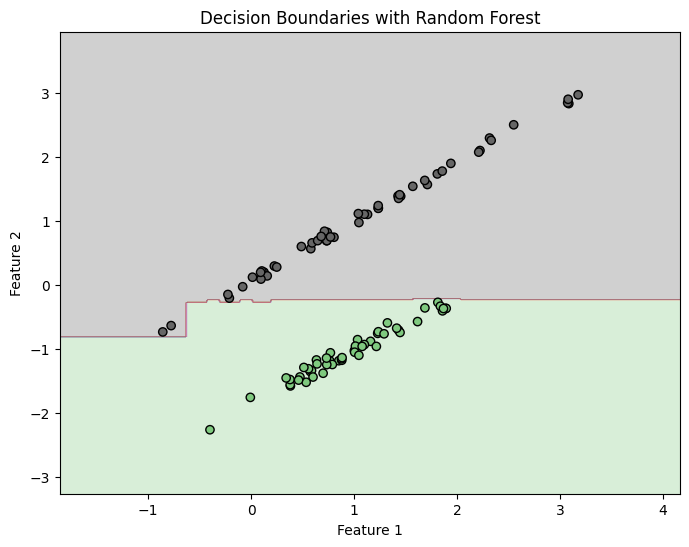

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#  Generating synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,       # 2 features for 2D visualization
    n_informative=2,    # number of informative features
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42
)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create mesh grid for plotting

h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting for each point in grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Ploting decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.title("Decision Boundaries with Random Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train a DecisionTreeClassifier on Iris dataset

### What this code does:

1. **Load the Iris dataset**  
   - Features (`X`) and labels (`y`) are extracted from the dataset.  

2. **Split the dataset**  
   - Divides the data into training and testing sets using `train_test_split`.  

3. **Create a Decision Tree classifier**  
   - Initializes a `DecisionTreeClassifier` with a random seed for reproducibility.  

4. **Train the classifier**  
   - Fits the classifier on the training data.  

5. **Make predictions**  
   - Uses the trained model to predict labels for the test set.  

6. **Evaluate accuracy**  
   - Compares predicted labels with actual labels using `accuracy_score` and prints the result.  

### Key Point:
- This code demonstrates a **basic workflow of training, predicting, and evaluating** a Decision Tree classifier on a standard dataset.


In [38]:
# Importing libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#  Spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#  Creating Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

#  Training the classifier
clf.fit(X_train, y_train)

#  Making predictions
y_pred = clf.predict(X_test)

#  Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
